## Raw Original Features

In [2]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

In [26]:
train_features_raw = pd.read_csv('data/final_data/train_features_raw.csv')
train_labels = pd.read_csv('data/final_data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Fare_clean_tr,Cabin,Cabin_ind,Embarked_clean,Title,Family_cnt
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.483840,-0.446199,0.450064,-0.544166,0.545364,0.430223,-0.540385
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.046993,0.373863,0.450064,-0.544166,-0.334468,-1.784129,2.277639
2,0.803682,0.737125,0.212735,-0.464063,-0.468427,0.594986,1.003414,0.450064,-0.544166,0.545364,0.430223,-0.540385
3,0.803682,-1.356623,-0.730480,0.325139,-0.468427,-0.499672,-0.494025,0.450064,-0.544166,0.545364,-1.230541,0.023220
4,-0.408652,-1.356623,-0.101670,-0.464063,-0.468427,-0.425203,-0.288093,0.450064,-0.544166,0.545364,-1.230541,-0.540385


In [56]:
# Generate correlation matrix heat map
def matrix(dataset):
    matrix = np.triu(dataset.corr())
    sns.heatmap(dataset.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

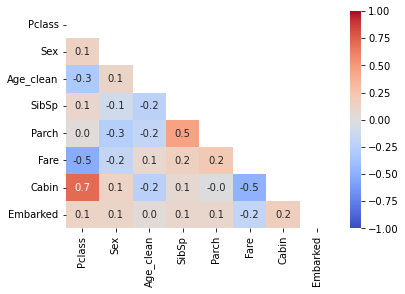

In [57]:
matrix(train_features_raw)

### GridSearchCV

In [70]:
def print_results(results):
    print("BEST PARAMS: {}\n".format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std *2, 3), params))

In [64]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

In [71]:
def cv(dataset, func):
    rf = RandomForestClassifier()
    parameters = {
        'n_estimators': [2**i for i in range(3, 10)],
        'max_depth': [2, 4, 8, 16, 32, None]
    }
    cv = GridSearchCV(rf, parameters, cv=5)
    cv.fit(dataset, train_labels.values.ravel())
    return cv 


In [72]:
print_results(cv)

AttributeError: 'function' object has no attribute 'best_params_'

### Feature Importance

In [36]:
# Generate feature importance plot
feat_imp = cv_row.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features_raw.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

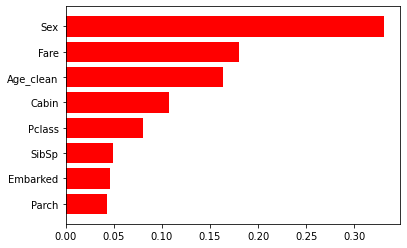

### Write Out Pickled Model

In [14]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'models/mdl_raw_original_features.pkl')

['models/mdl_raw_original_features.pkl']

## Cleaned Original Features

In [41]:
train_features_original = pd.read_csv('data/final_data/train_features_original.csv')
train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Fare_clean_tr,Cabin,Cabin_ind,Embarked_clean,Title,Family_cnt
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.483840,-0.446199,0.450064,-0.544166,0.545364,0.430223,-0.540385
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.046993,0.373863,0.450064,-0.544166,-0.334468,-1.784129,2.277639
2,0.803682,0.737125,0.212735,-0.464063,-0.468427,0.594986,1.003414,0.450064,-0.544166,0.545364,0.430223,-0.540385
3,0.803682,-1.356623,-0.730480,0.325139,-0.468427,-0.499672,-0.494025,0.450064,-0.544166,0.545364,-1.230541,0.023220
4,-0.408652,-1.356623,-0.101670,-0.464063,-0.468427,-0.425203,-0.288093,0.450064,-0.544166,0.545364,-1.230541,-0.540385


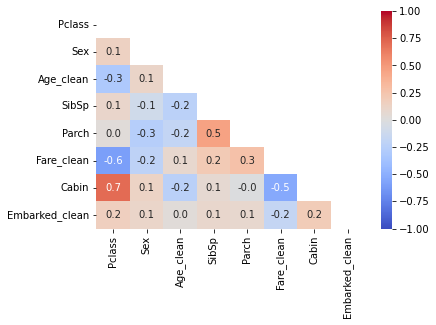

In [58]:
matrix(train_features_original)

In [44]:
cv_original = GridSearchCV(rf, parameters, cv=5)
cv_original.fit(train_features_original, train_labels.values.ravel())

print_results(cv_original)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 32}

0.8 (+/-0.104) for {'max_depth': 2, 'n_estimators': 8}
0.789 (+/-0.111) for {'max_depth': 2, 'n_estimators': 16}
0.79 (+/-0.106) for {'max_depth': 2, 'n_estimators': 32}
0.792 (+/-0.102) for {'max_depth': 2, 'n_estimators': 64}
0.8 (+/-0.112) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.095) for {'max_depth': 2, 'n_estimators': 256}
0.796 (+/-0.105) for {'max_depth': 2, 'n_estimators': 512}
0.813 (+/-0.081) for {'max_depth': 4, 'n_estimators': 8}
0.818 (+/-0.075) for {'max_depth': 4, 'n_estimators': 16}
0.82 (+/-0.078) for {'max_depth': 4, 'n_estimators': 32}
0.822 (+/-0.113) for {'max_depth': 4, 'n_estimators': 64}
0.82 (+/-0.114) for {'max_depth': 4, 'n_estimators': 128}
0.826 (+/-0.115) for {'max_depth': 4, 'n_estimators': 256}
0.822 (+/-0.119) for {'max_depth': 4, 'n_estimators': 512}
0.82 (+/-0.073) for {'max_depth': 8, 'n_estimators': 8}
0.817 (+/-0.048) for {'max_depth': 8, 'n_estimators': 16}
0.846 (+/-0.056) for {'max

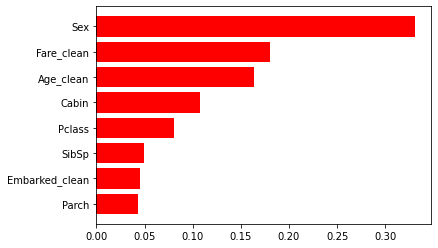

In [45]:
# Generate feature importance plot
plt.yticks(range(len(indices)), [train_features_original.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [47]:
# Write out the model fit on the whole training set
joblib.dump(cv_original.best_estimator_, 'models/mdl_cleaned_original_features.pkl')

['models/mdl_cleaned_original_features.pkl']

## All Features

In [48]:
train_features_all = pd.read_csv('data/final_data/train_features_all.csv')
train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Fare_clean_tr,Cabin,Cabin_ind,Embarked_clean,Title,Family_cnt
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.483840,-0.446199,0.450064,-0.544166,0.545364,0.430223,-0.540385
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.046993,0.373863,0.450064,-0.544166,-0.334468,-1.784129,2.277639
2,0.803682,0.737125,0.212735,-0.464063,-0.468427,0.594986,1.003414,0.450064,-0.544166,0.545364,0.430223,-0.540385
3,0.803682,-1.356623,-0.730480,0.325139,-0.468427,-0.499672,-0.494025,0.450064,-0.544166,0.545364,-1.230541,0.023220
4,-0.408652,-1.356623,-0.101670,-0.464063,-0.468427,-0.425203,-0.288093,0.450064,-0.544166,0.545364,-1.230541,-0.540385


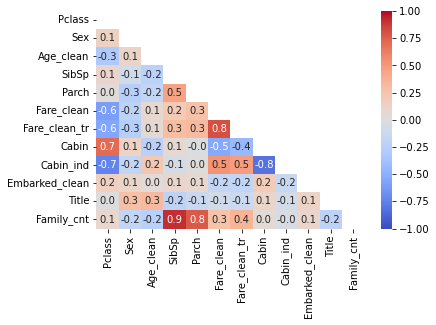

In [59]:
matrix(train_features_all)

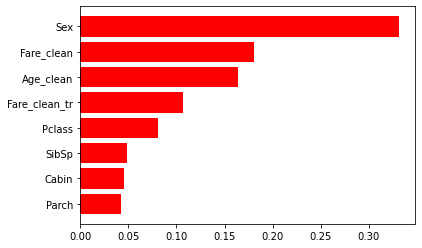

In [50]:
plt.yticks(range(len(indices)), [train_features_all.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [53]:
# Write out the model fit on the whole training set
joblib.dump(cv_original.best_estimator_, 'models/mdl_all_features.pkl')

['models/mdl_all_features.pkl']

## Reduced Set Of Features 

In [54]:
train_features = pd.read_csv('data/final_data/train_features_reduced.csv')
train_features.head()

,Pclass,Sex,Age_clean,Family_cnt,Fare_clean_tr,Cabin_ind,Title
0,-0.408652,0.737125,2.570771,-0.540385,-0.446199,-0.544166,0.430223
1,0.803682,0.737125,-1.673694,2.277639,0.373863,-0.544166,-1.784129
2,0.803682,0.737125,0.212735,-0.540385,1.003414,-0.544166,0.430223
3,0.803682,-1.356623,-0.730480,0.023220,-0.494025,-0.544166,-1.230541
4,-0.408652,-1.356623,-0.101670,-0.540385,-0.288093,-0.544166,-1.230541
